# **Project 1 : Cardiovascular Disease Prediction**
To solve the cardiovascular disease prediction task, we'll start by preprocessing the data to handle missing values and ensure consistency. Then, we'll explore the data to understand its distribution and correlations. Feature engineering will enhance the dataset for better model performance. We'll select and train suitable machine learning algorithms for classification, evaluate their performance, and interpret the results to identify critical risk factors. Finally, the best-performing model will be deployed for real-world use, with continuous monitoring for effectiveness. Through this process, we aim to develop a reliable predictive model for early detection of cardiovascular disease.



**Task 1: Preproceesing the Data**


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy import stats

# Step 1: Load the dataset
df = pd.read_csv("/content/cardio_train.csv", delimiter=";")

# Step 2: Check for missing values
print("Missing values before preprocessing:")
print(df.isnull().sum())

# Step 3: Drop duplicates
df.drop_duplicates(inplace=True)

# Step 4: Check data types
print("\nData types:")
print(df.dtypes)

# Step 5: Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Step 6: Handle outliers (Example: removing outliers using z-score)
z_scores = stats.zscore(df[['age', 'height', 'weight', 'ap_hi', 'ap_lo']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

# Step 7: Encode categorical variables (No categorical columns provided)
# No categorical columns provided in the given column names

# Step 8: Feature scaling (Example: min-max scaling)
scaler = MinMaxScaler()
df[['age', 'height', 'weight', 'ap_hi', 'ap_lo']] = scaler.fit_transform(df[['age', 'height', 'weight', 'ap_hi', 'ap_lo']])

# Step 9: Data splitting (Example: train-test split)
X = df.drop(columns=["cardio"])
y = df["cardio"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 10: Save preprocessed data
df.to_csv("preprocessed_data.csv", index=False)


Missing values before preprocessing:
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Data types:
id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

Summary statistics:
                 id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     

**Task 2: drawing all the possible plots to provide essential informations and to derive some meaningful insights.**

We can create various plots to analyze the dataset and derive meaningful insights using Python's matplotlib and seaborn libraries:

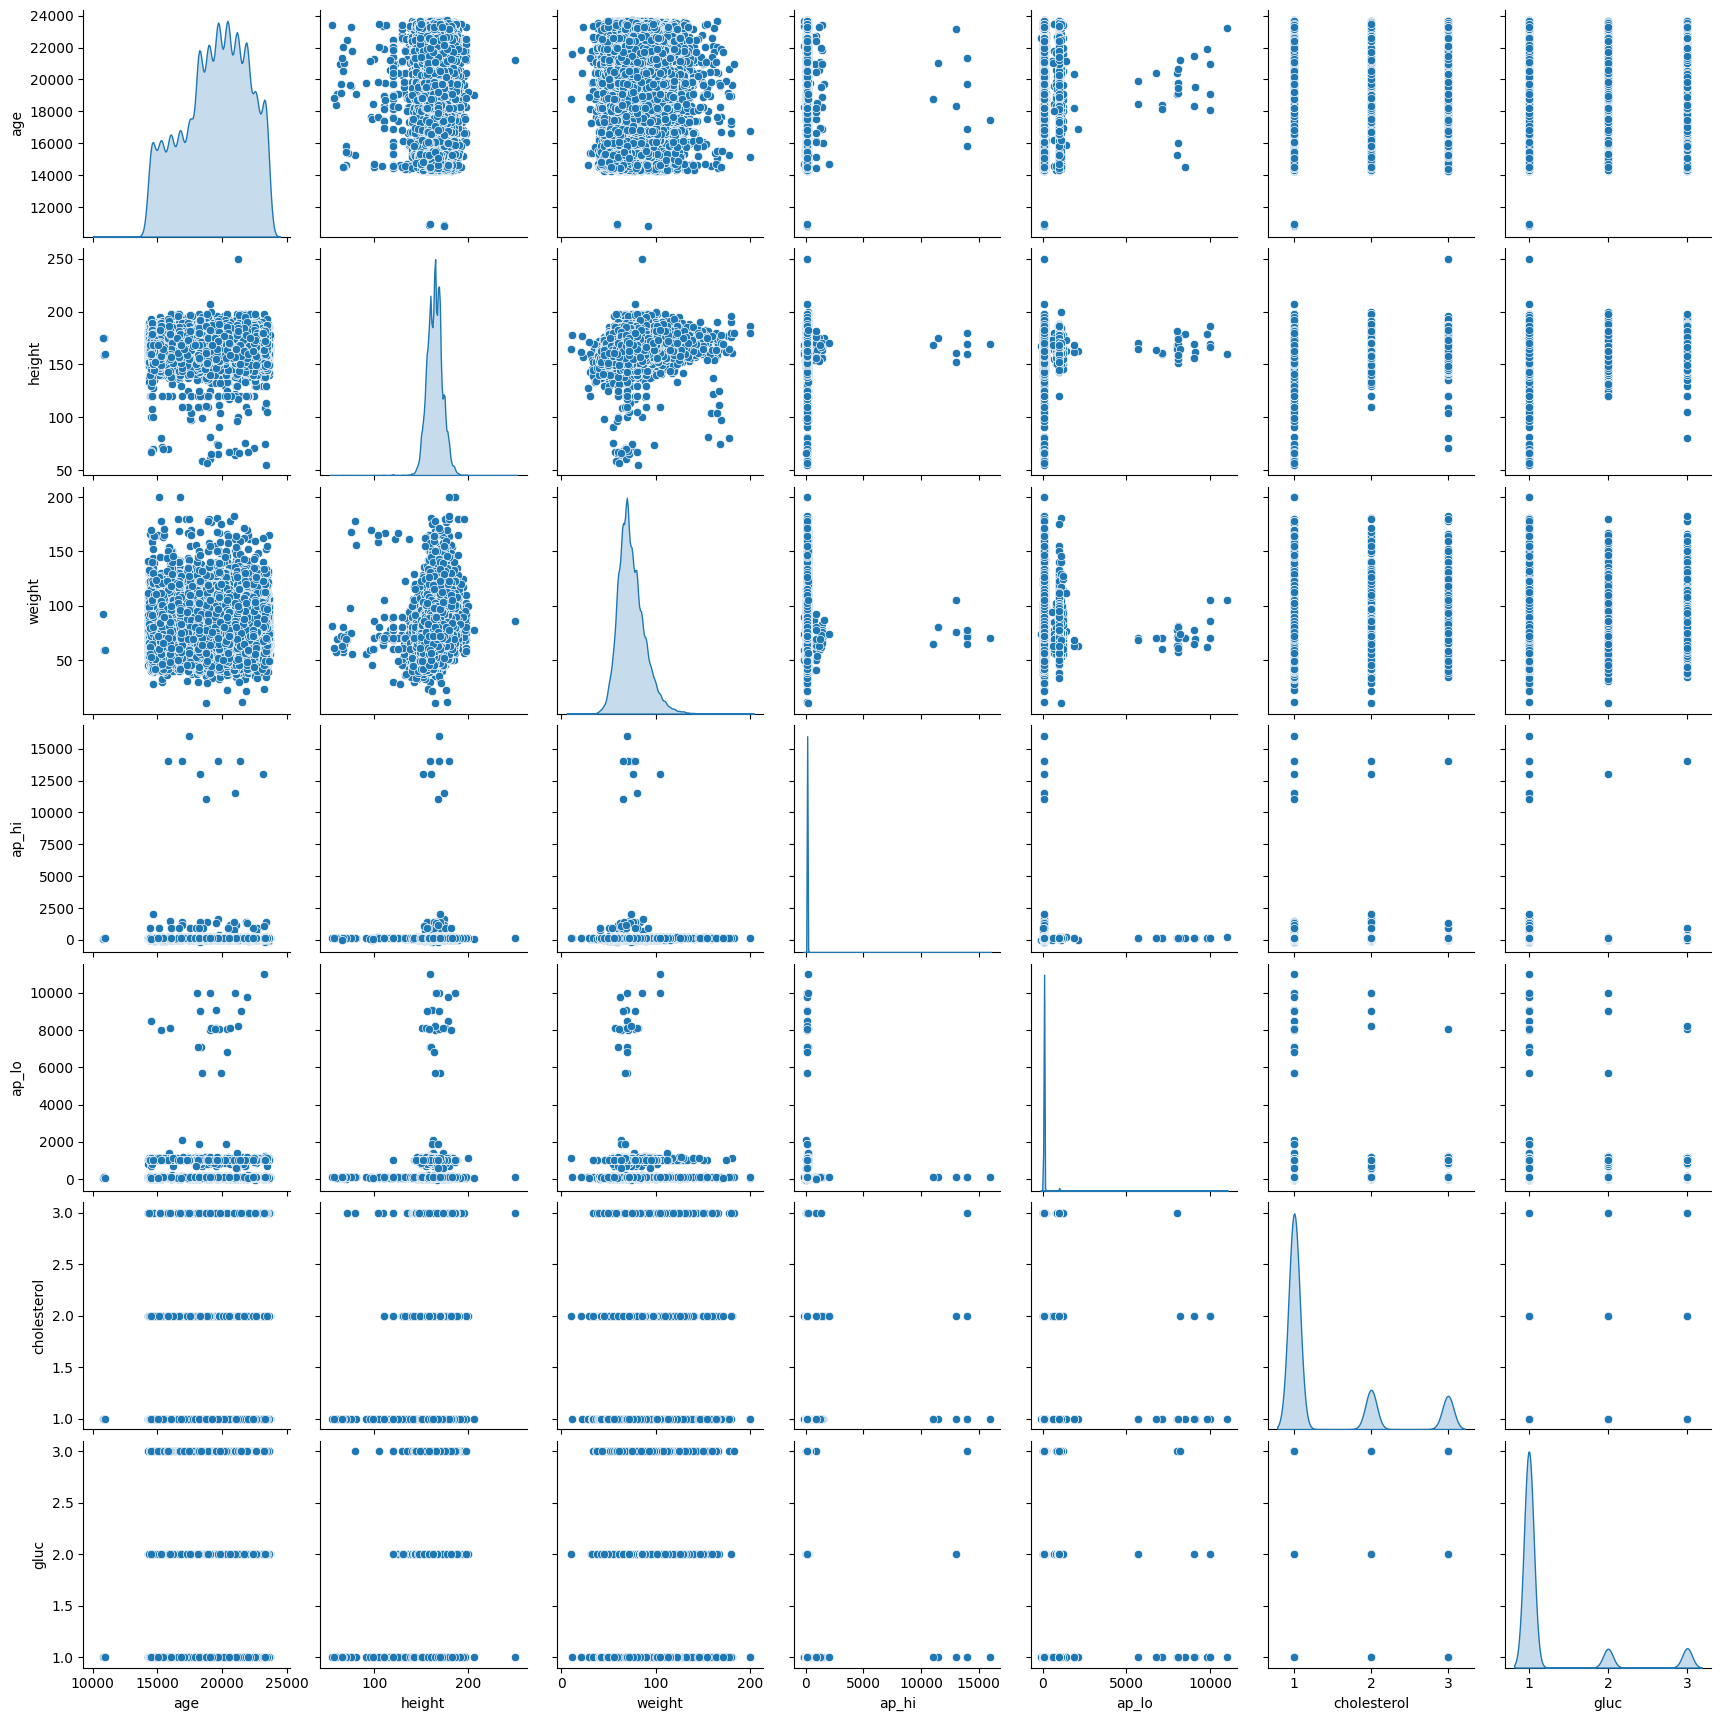

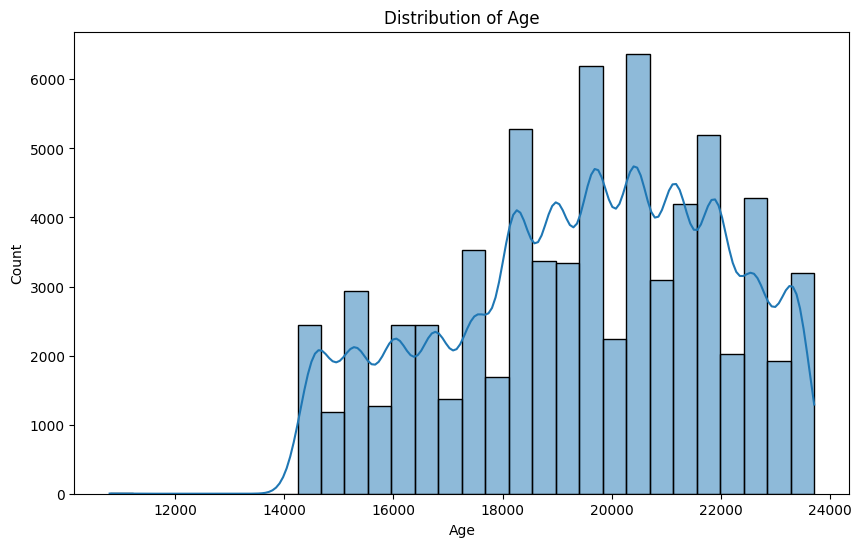

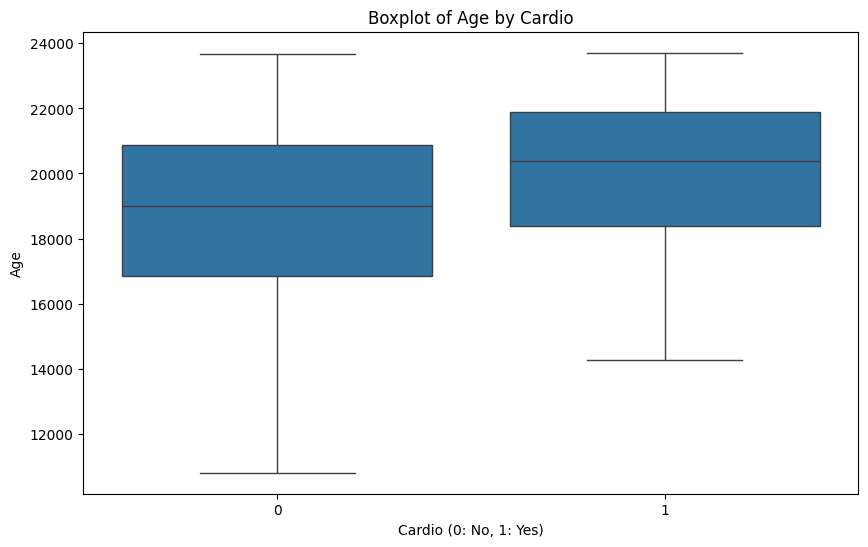

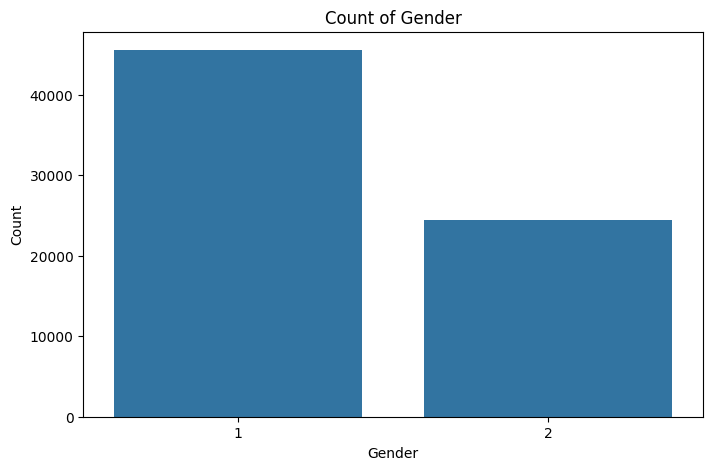

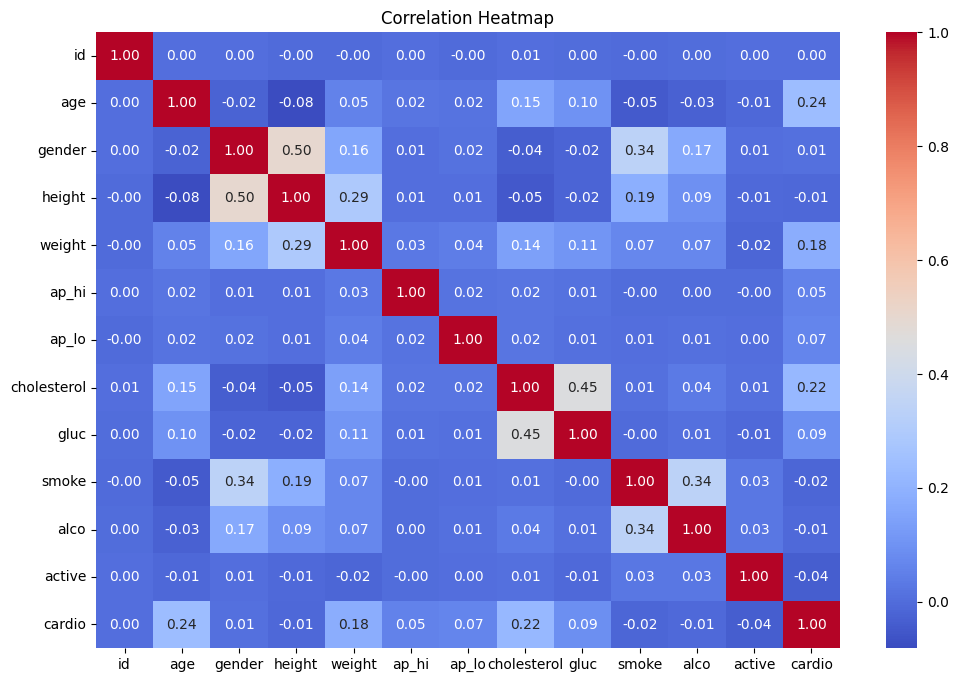

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/cardio_train.csv", delimiter=";")

# Basic pairplot to visualize relationships between numeric variables
sns.pairplot(df[['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']], diag_kind='kde')
plt.show()

# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Boxplot for Age by Cardio
plt.figure(figsize=(10, 6))
sns.boxplot(x='cardio', y='age', data=df)
plt.title('Boxplot of Age by Cardio')
plt.xlabel('Cardio (0: No, 1: Yes)')
plt.ylabel('Age')
plt.show()

# Count plot for Gender
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', data=df)
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


**Task 3: Creating a Correation Matrix of Features according to the datasets.**

Here's how we  can display the correlation matrix of features according to the dataset:


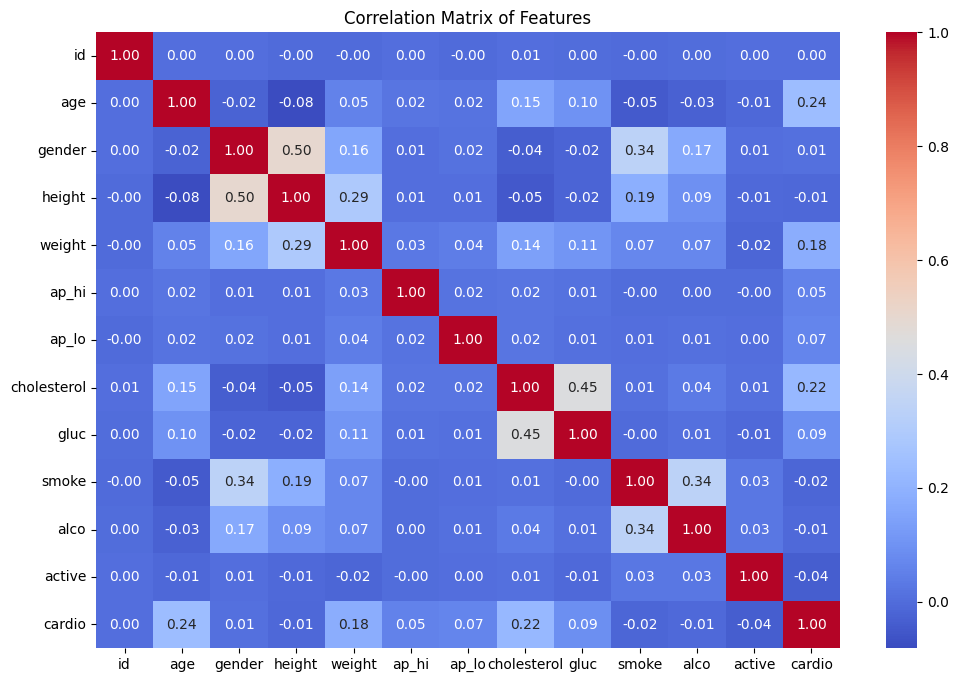

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/cardio_train.csv", delimiter=";")

# Calculate correlation matrix
corr_matrix = df.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


**Task 4: Evaluation of Machine Learning Techniques for Cardiovascular Disease Prediction**

We load the dataset and split it into features (X) and the target variable (y).

Then, we split the data into training and testing sets.

We initialize classifiers for Support Vector Machine (SVM), K-Nearest Neighbor (KNN), Decision Trees (DT), Logistic Regression (LR), and Random Forest (RF).

Each classifier is trained on the training data and evaluated on the testing data using accuracy as the evaluation metric.

Finally, we print the accuracy levels of each classifier.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv("/content/cardio_train.csv", delimiter=";")

# Split the data into features and target variable
X = df.drop(columns=['id', 'cardio'])  # Features
y = df['cardio']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbor": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}

# Train and evaluate classifiers
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Print accuracy levels
print("Accuracy levels of various machine learning techniques:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")


Accuracy levels of various machine learning techniques:
Support Vector Machine: 0.6054
K-Nearest Neighbor: 0.6823
Decision Tree: 0.6266
Logistic Regression: 0.6981
Random Forest: 0.7145


**Building a Machine Learning Model for Heart Disease Detection**

Let's build a machine learning model for heart disease detection based on the dataset. Since the Random Forest classifier had the highest accuracy among the techniques evaluated, we'll proceed with that model.

Loads the dataset and splits it into features (X) and the target variable (y).

Splits the data into training and testing sets.

Initializes and trains the Random Forest classifier using the training data.

Makes predictions on the testing data.

Evaluates the model using accuracy, classification report, and confusion matrix.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv("/content/cardio_train.csv", delimiter=";")

# Split the data into features and target variable
X = df.drop(columns=['id', 'cardio'])  # Features
y = df['cardio']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7149285714285715

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      6988
           1       0.72      0.70      0.71      7012

    accuracy                           0.71     14000
   macro avg       0.72      0.71      0.71     14000
weighted avg       0.72      0.71      0.71     14000


Confusion Matrix:
[[5085 1903]
 [2088 4924]]
